## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9764638	total: 52.3ms	remaining: 52.3s
1:	learn: 0.9439581	total: 52.7ms	remaining: 26.3s
2:	learn: 0.9164279	total: 53.1ms	remaining: 17.6s
3:	learn: 0.8853929	total: 53.8ms	remaining: 13.4s
4:	learn: 0.8603949	total: 54.2ms	remaining: 10.8s
5:	learn: 0.8322641	total: 54.8ms	remaining: 9.07s
6:	learn: 0.8095994	total: 55ms	remaining: 7.8s
7:	learn: 0.7843013	total: 55.7ms	remaining: 6.91s
8:	learn: 0.7585983	total: 56.3ms	remaining: 6.2s
9:	learn: 0.7343914	total: 56.8ms	remaining: 5.63s
10:	learn: 0.7113710	total: 57.4ms	remaining: 5.16s
11:	learn: 0.6883106	total: 57.9ms	remaining: 4.77s
12:	learn: 0.6683102	total: 58.3ms	remaining: 4.42s
13:	learn: 0.6480271	total: 58.8ms	remaining: 4.14s
14:	learn: 0.6279392	total: 60.8ms	remaining: 3.99s
15:	learn: 0.6080911	total: 61.9ms	remaining: 3.81s
16:	learn: 0.5892848	total: 62.4ms	remaining: 3.61s
17:	learn: 0.5719726	total: 62.8ms	remaining: 3.42s
18:	learn: 0.5562263	total: 63.3ms	remaining: 3.

141:	learn: 0.0532665	total: 150ms	remaining: 907ms
142:	learn: 0.0529786	total: 150ms	remaining: 902ms
143:	learn: 0.0527262	total: 151ms	remaining: 896ms
144:	learn: 0.0523583	total: 151ms	remaining: 890ms
145:	learn: 0.0521057	total: 152ms	remaining: 891ms
146:	learn: 0.0517760	total: 153ms	remaining: 888ms
147:	learn: 0.0515200	total: 154ms	remaining: 885ms
148:	learn: 0.0512140	total: 154ms	remaining: 881ms
149:	learn: 0.0509801	total: 155ms	remaining: 878ms
150:	learn: 0.0506638	total: 156ms	remaining: 874ms
151:	learn: 0.0503546	total: 156ms	remaining: 871ms
152:	learn: 0.0499612	total: 157ms	remaining: 867ms
153:	learn: 0.0496317	total: 157ms	remaining: 862ms
154:	learn: 0.0492788	total: 158ms	remaining: 859ms
155:	learn: 0.0490342	total: 158ms	remaining: 855ms
156:	learn: 0.0487501	total: 158ms	remaining: 851ms
157:	learn: 0.0484639	total: 159ms	remaining: 847ms
158:	learn: 0.0482065	total: 160ms	remaining: 844ms
159:	learn: 0.0479859	total: 160ms	remaining: 840ms
160:	learn: 

384:	learn: 0.0255355	total: 304ms	remaining: 485ms
385:	learn: 0.0254962	total: 304ms	remaining: 484ms
386:	learn: 0.0254641	total: 306ms	remaining: 485ms
387:	learn: 0.0253926	total: 307ms	remaining: 484ms
388:	learn: 0.0253344	total: 308ms	remaining: 483ms
389:	learn: 0.0252893	total: 308ms	remaining: 482ms
390:	learn: 0.0252455	total: 308ms	remaining: 480ms
391:	learn: 0.0252031	total: 309ms	remaining: 479ms
392:	learn: 0.0251480	total: 309ms	remaining: 478ms
393:	learn: 0.0251221	total: 310ms	remaining: 477ms
394:	learn: 0.0250807	total: 310ms	remaining: 475ms
395:	learn: 0.0250059	total: 311ms	remaining: 474ms
396:	learn: 0.0249677	total: 311ms	remaining: 473ms
397:	learn: 0.0249426	total: 312ms	remaining: 472ms
398:	learn: 0.0249160	total: 312ms	remaining: 470ms
399:	learn: 0.0248936	total: 313ms	remaining: 469ms
400:	learn: 0.0248587	total: 313ms	remaining: 468ms
401:	learn: 0.0248328	total: 314ms	remaining: 467ms
402:	learn: 0.0248174	total: 314ms	remaining: 465ms
403:	learn: 

590:	learn: 0.0193941	total: 452ms	remaining: 313ms
591:	learn: 0.0193784	total: 453ms	remaining: 312ms
592:	learn: 0.0193580	total: 454ms	remaining: 311ms
593:	learn: 0.0193502	total: 454ms	remaining: 310ms
594:	learn: 0.0193219	total: 455ms	remaining: 309ms
595:	learn: 0.0192992	total: 455ms	remaining: 309ms
596:	learn: 0.0192723	total: 456ms	remaining: 308ms
597:	learn: 0.0192609	total: 456ms	remaining: 307ms
598:	learn: 0.0192367	total: 457ms	remaining: 306ms
599:	learn: 0.0192030	total: 457ms	remaining: 305ms
600:	learn: 0.0191858	total: 458ms	remaining: 304ms
601:	learn: 0.0191691	total: 458ms	remaining: 303ms
602:	learn: 0.0191561	total: 458ms	remaining: 302ms
603:	learn: 0.0191312	total: 459ms	remaining: 301ms
604:	learn: 0.0191076	total: 459ms	remaining: 300ms
605:	learn: 0.0190953	total: 460ms	remaining: 299ms
606:	learn: 0.0190542	total: 460ms	remaining: 298ms
607:	learn: 0.0190388	total: 461ms	remaining: 297ms
608:	learn: 0.0190285	total: 461ms	remaining: 296ms
609:	learn: 

858:	learn: 0.0149416	total: 600ms	remaining: 98.4ms
859:	learn: 0.0149124	total: 601ms	remaining: 97.8ms
860:	learn: 0.0148547	total: 601ms	remaining: 97.1ms
861:	learn: 0.0148342	total: 602ms	remaining: 96.3ms
862:	learn: 0.0148306	total: 602ms	remaining: 95.5ms
863:	learn: 0.0148194	total: 602ms	remaining: 94.8ms
864:	learn: 0.0147939	total: 602ms	remaining: 94ms
865:	learn: 0.0147815	total: 603ms	remaining: 93.3ms
866:	learn: 0.0147759	total: 604ms	remaining: 92.6ms
867:	learn: 0.0147623	total: 604ms	remaining: 91.8ms
868:	learn: 0.0147606	total: 604ms	remaining: 91.1ms
869:	learn: 0.0147509	total: 605ms	remaining: 90.4ms
870:	learn: 0.0147449	total: 605ms	remaining: 89.7ms
871:	learn: 0.0147333	total: 606ms	remaining: 89ms
872:	learn: 0.0147125	total: 607ms	remaining: 88.2ms
873:	learn: 0.0147064	total: 607ms	remaining: 87.5ms
874:	learn: 0.0146970	total: 608ms	remaining: 86.8ms
875:	learn: 0.0146731	total: 608ms	remaining: 86.1ms
876:	learn: 0.0146640	total: 609ms	remaining: 85.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.020446134302622095
ABC Pre-generator MAE 0.7930206591351687


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

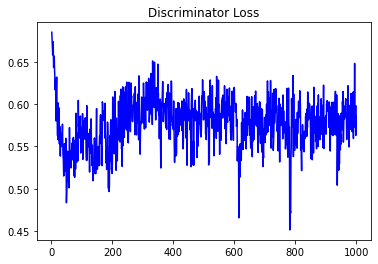

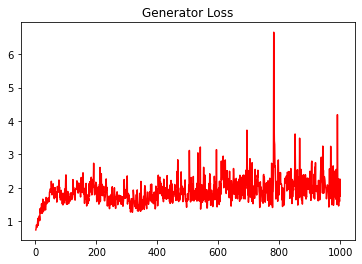

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.05965067795925326


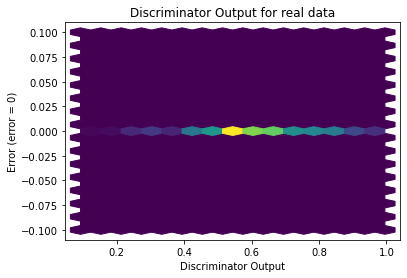

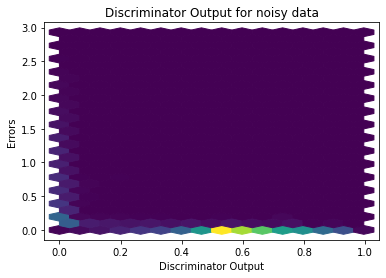

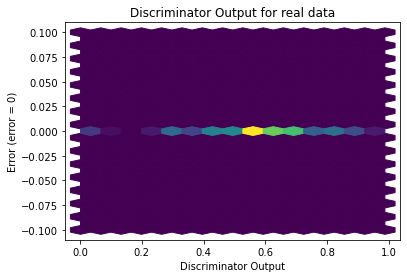

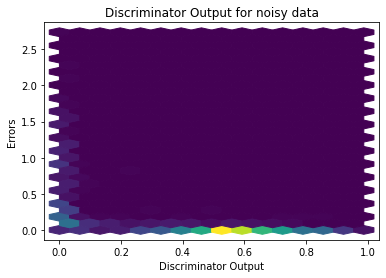

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


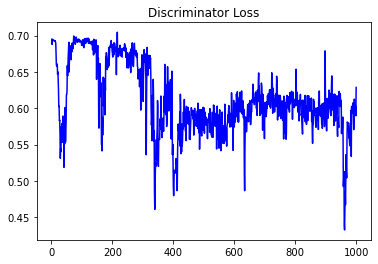

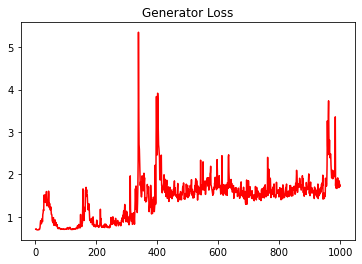

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.15356350250254527


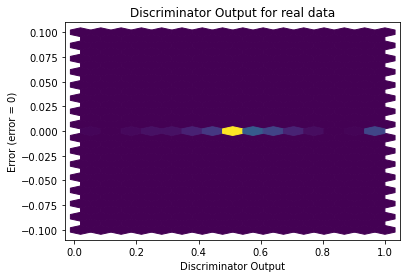

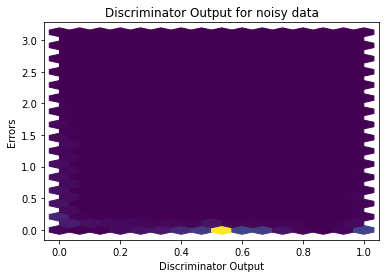

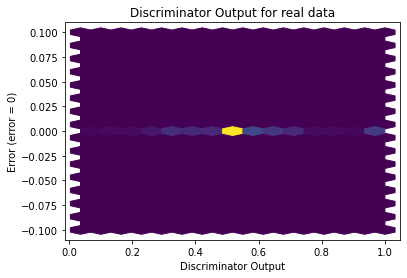

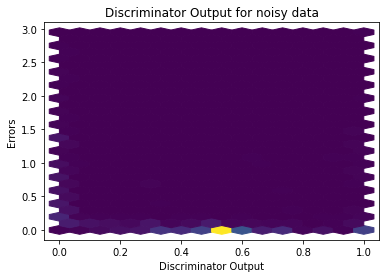

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


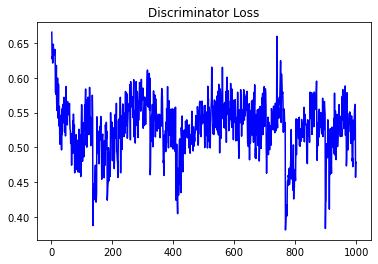

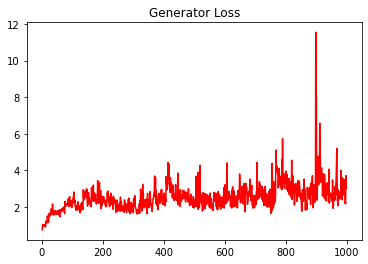

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.08001772212711247


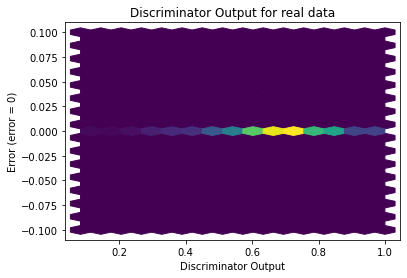

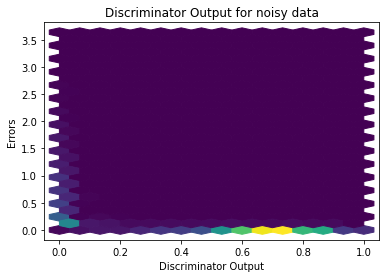

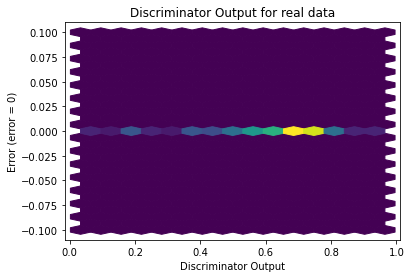

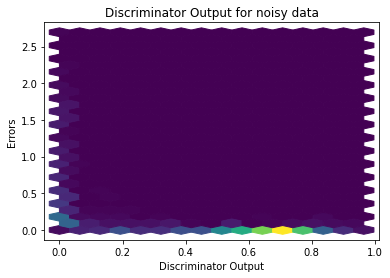

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9690]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9949]], requires_grad=True)
